# EDA Project - House Sales Analysis in King County

In [100]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "images/King_County_Map.jpeg", width = 600)

## Introduction
This project is centered around exploratory data analysis techniques and presentation of results to a client.   
  
Data: king_county_housing_data.csv   
This dataset contains information about home sales in King County (USA) from May 2014 to May 2015


### Business Case:
Our stakeholder is Charles Christensen, who is a seller of a house agent. As a real estate agent, he earns a commission on the sales or purchase price of a property. He wants to invest with big returns.  
So, our target is to analyze the King County housing data and give him suggestions for selling more houses, especially selling more expensive houses, so that he could get much more payment.   
The following questions will be research:  

1. Which  factors have the greatest impact on house price?
2. When is the best timing for house sales business?
3. Which factors are the key to increase the sale of expensive houses?

## Preparation  
After understanding our task, we should do some preparations before starting dealing our data.  
- Set up your environment  
- Import necessary packages and libraries

In [101]:
# import packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# import missingno
import missingno as msno

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format

## Understand your data  
Now we can start our EDA process. We should read in our data and get some basic information for our dataset.

In [102]:
# read in csv file and display first 5 rows of dataset
df = pd.read_csv("data/king_county_housing_data.csv")
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.00,1.00,"1,180.00","5,650.00",1.00,NaN,0.00,3,7,...,0.00,1955,0.00,98178,47.51,-122.26,"1,340.00","5,650.00",2014-10-13,"221,900.00"
1,6414100192,3.00,2.25,"2,570.00","7,242.00",2.00,0.00,0.00,3,7,...,400.00,1951,"19,910.00",98125,47.72,-122.32,"1,690.00","7,639.00",2014-12-09,"538,000.00"
2,5631500400,2.00,1.00,770.00,"10,000.00",1.00,0.00,0.00,3,6,...,0.00,1933,NaN,98028,47.74,-122.23,"2,720.00","8,062.00",2015-02-25,"180,000.00"
3,2487200875,4.00,3.00,"1,960.00","5,000.00",1.00,0.00,0.00,5,7,...,910.00,1965,0.00,98136,47.52,-122.39,"1,360.00","5,000.00",2014-12-09,"604,000.00"
4,1954400510,3.00,2.00,"1,680.00","8,080.00",1.00,0.00,0.00,3,8,...,0.00,1987,0.00,98074,47.62,-122.05,"1,800.00","7,503.00",2015-02-18,"510,000.00"


In [103]:
# Check for the column names
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

In [104]:
# Check the number of rows and columns in the data frame
df.shape

(21597, 21)

In [105]:
# Check information about the data frame (column name, data type, non-null count, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

Based on the above information, we have following findings:  
1. data type of date-related columns should be changed to datetime format: "yr_built", "yr_renovated", "date".
2. dtype of column "waterfront" could be changed as boolean type.
3. Missing values in "waterfront", "view", "sqft_basement", "yr_renovated".  

In [106]:
# Check descriptive statistics of the dataset
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,206.00","21,534.00","21,597.00","21,597.00","21,597.00","21,145.00","21,597.00","17,749.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60",291.86,"1,971.00",836.65,"98,077.95",47.56,-122.21,"1,986.62","12,758.28","540,296.57"
std,"2,876,735,715.75",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,442.49,29.38,"4,000.11",53.51,0.14,0.14,685.23,"27,274.44","367,368.14"
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00,"78,000.00"
25%,"2,123,049,175.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","322,000.00"
50%,"3,904,930,410.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","450,000.00"
75%,"7,308,900,490.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00","645,000.00"
max,"9,900,000,190.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","20,150.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","7,700,000.00"


## Explore and clearn your data  

### Check duplicate rows  
Let's check if we have the same houses (with the same id) several times in our dataset.

In [107]:
# check for duplicate rows in id column 
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

So we have 21597 house sales records to analyze. But we have only 21420 unique houses in our dataset. These 177 duplicate rows exist, since some of the houses have been sold more than once at different time, which is also interested for us.  
For our following analysis, we will apply all these 21597 sales record and not only on the unique houses. Each sales record of the house will make our prediction more accurate.

### Check data types & Create new columns


#### Deal with date-related Columns

In [108]:
# change "date" dtype to datetime with format %Y/%m/%d
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

# extract year, month, weekday information out of the column date and build new column for each
df['sale_yr']=df['date'].dt.year
df['sale_month']=df['date'].dt.month

# create a new column as the age of the house
df['age_house'] = df['sale_yr'] - df['yr_built']
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sale_yr,sale_month,age_house
0,7129300520,3.00,1.00,"1,180.00","5,650.00",1.00,NaN,0.00,3,7,...,98178,47.51,-122.26,"1,340.00","5,650.00",2014-10-13,"221,900.00",2014,10,59
1,6414100192,3.00,2.25,"2,570.00","7,242.00",2.00,0.00,0.00,3,7,...,98125,47.72,-122.32,"1,690.00","7,639.00",2014-12-09,"538,000.00",2014,12,63
2,5631500400,2.00,1.00,770.00,"10,000.00",1.00,0.00,0.00,3,6,...,98028,47.74,-122.23,"2,720.00","8,062.00",2015-02-25,"180,000.00",2015,2,82
3,2487200875,4.00,3.00,"1,960.00","5,000.00",1.00,0.00,0.00,5,7,...,98136,47.52,-122.39,"1,360.00","5,000.00",2014-12-09,"604,000.00",2014,12,49
4,1954400510,3.00,2.00,"1,680.00","8,080.00",1.00,0.00,0.00,3,8,...,98074,47.62,-122.05,"1,800.00","7,503.00",2015-02-18,"510,000.00",2015,2,28


In [109]:
# display all distinct elements of renovated year
df['yr_renovated'].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

As shown above, we can see that the values in the column "yr_renovated" are not correctly recorded. The values are 10 times bigger that the real year number. So we should convert them to the right one.

In [110]:
# convert the "yr_renovated" to the right number and change the dtype to date time format
df['yr_renovated'] = df.yr_renovated.apply(lambda x: x/10)

In [111]:
# check how many rows with "0" in yr_renovated column
df.query('yr_renovated == 0')['yr_renovated'].count()

17005

If "yr_renovated" is 0, then we consider that no renovation happened. We could set the built year of the house as the renovation year, so that we could calculate how many years after the renovation was the house sold.

In [112]:
# change the 0 value in column 'yr_renovated' to the 'yr_built' value
yr_reno_array = df['yr_renovated'].to_list()
yr_built_array = df["yr_built"].to_list()
yr_reno_array
for i in range(0,len(yr_reno_array)):
    if yr_reno_array[i] == 0:
        yr_reno_array[i] = yr_built_array[i]
df['yr_renovated'] = yr_reno_array

df['yr_renovated'].head()


0   1,955.00
1   1,991.00
2        NaN
3   1,965.00
4   1,987.00
Name: yr_renovated, dtype: float64

In [113]:
# create new column as the age of renovation
df['age_reno'] = df['sale_yr'] - df['yr_renovated']
df['age_reno'].head()

0   59.00
1   23.00
2     NaN
3   49.00
4   28.00
Name: age_reno, dtype: float64

#### Check "waterfront" Columns

In [114]:
df['waterfront'].unique()

array([nan,  0.,  1.])

We can see that there're only three distinct values in the column.  
In our case, 1 represents that the house has a view to a waterfront, 0 represents that the house has no view to a waterfront, nan should come from the missing values.  
In case that we will change the NAN value to False, we can change the type after dealing with the missing value.

### Deal with Missing values  
We have already noticed that there are some missing values in the columns. Let's check them.

In [115]:
# display number of missing values per column
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
sale_yr             0
sale_month          0
age_house           0
age_reno         3848
dtype: int64

<AxesSubplot:>

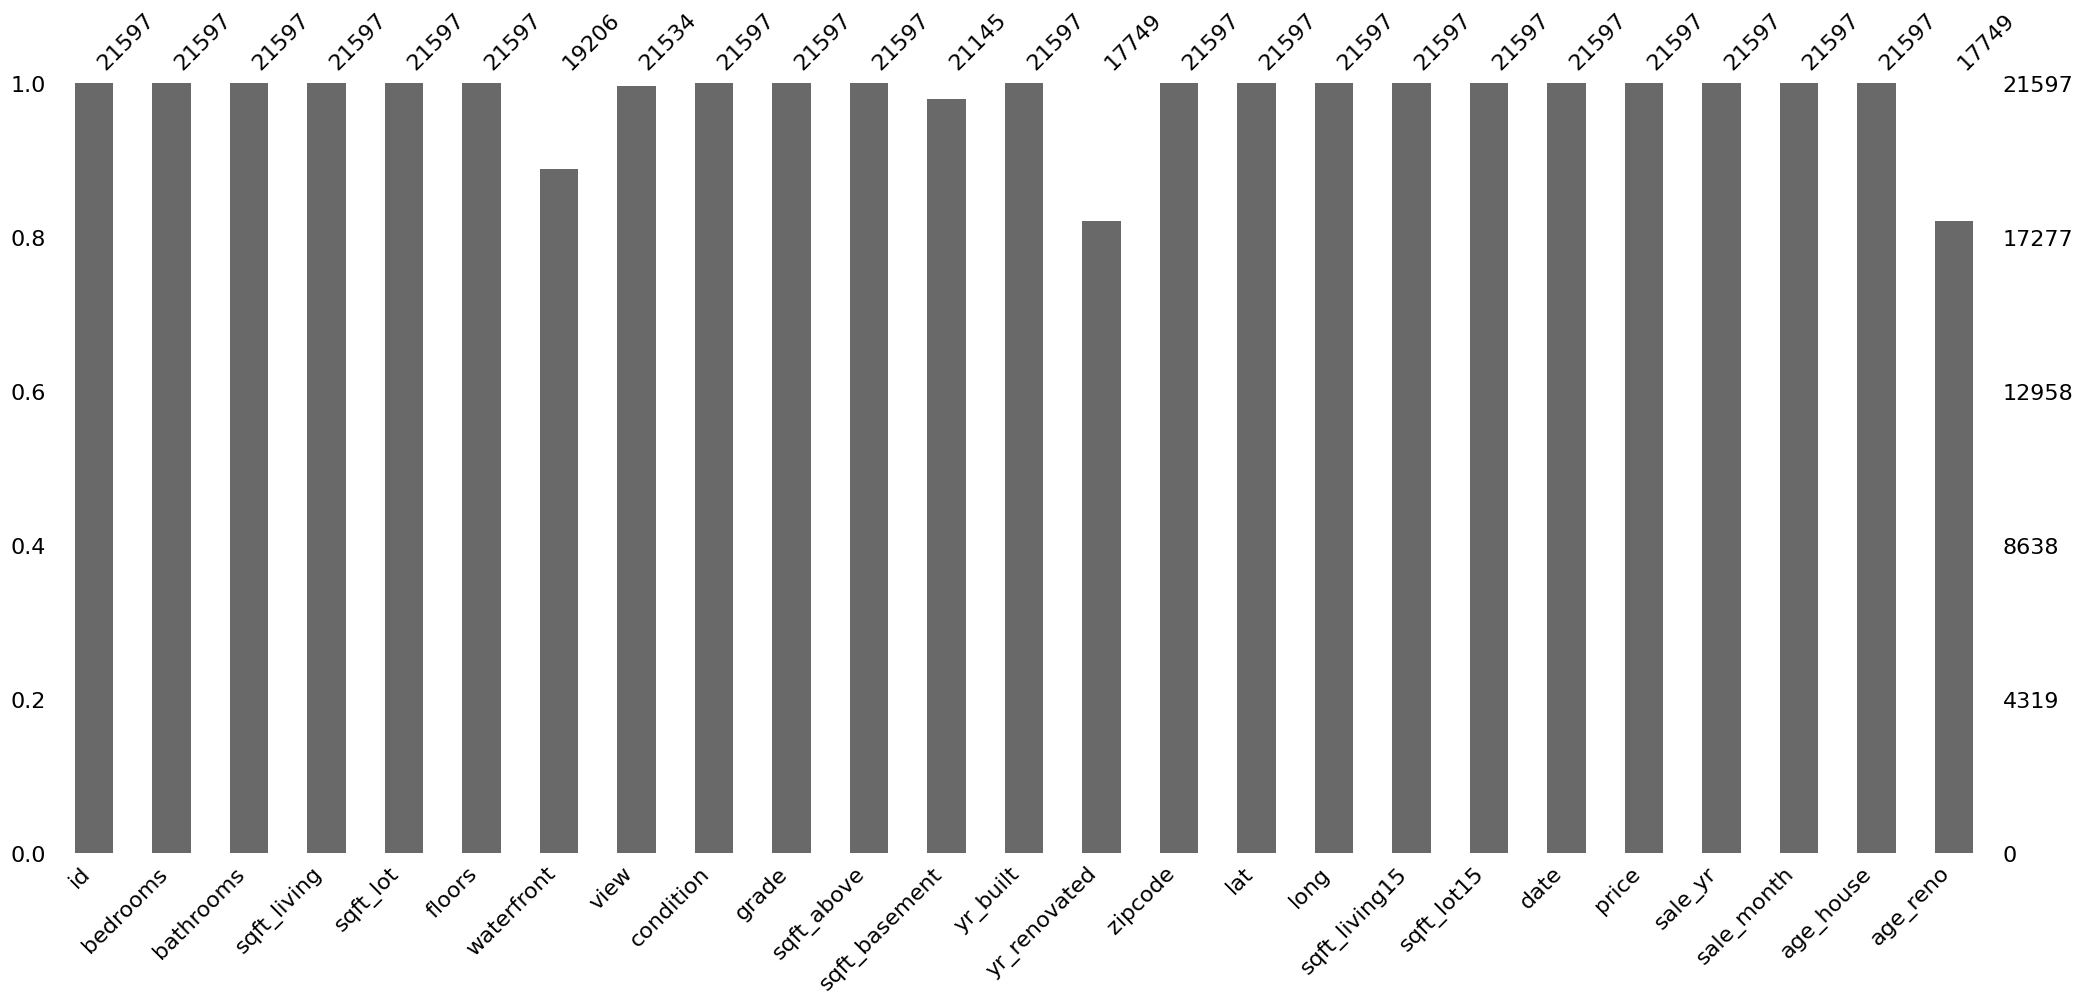

In [116]:
# plotting percentage of missing values per column
msno.bar(df)

We can see that only 4 columns contain missing values:  
- about 20% of the data is missing in the column "yr_renovated", as well as the column "age_reno" which calculated from the column "yr_renovated".  
- about 11% of the data is missing in the column "waterfront".  
- only 0.3% of the data is missing in the column "view".
  
Now, Let's print a matrix plot to see the distribution of the missing values.

<AxesSubplot:>

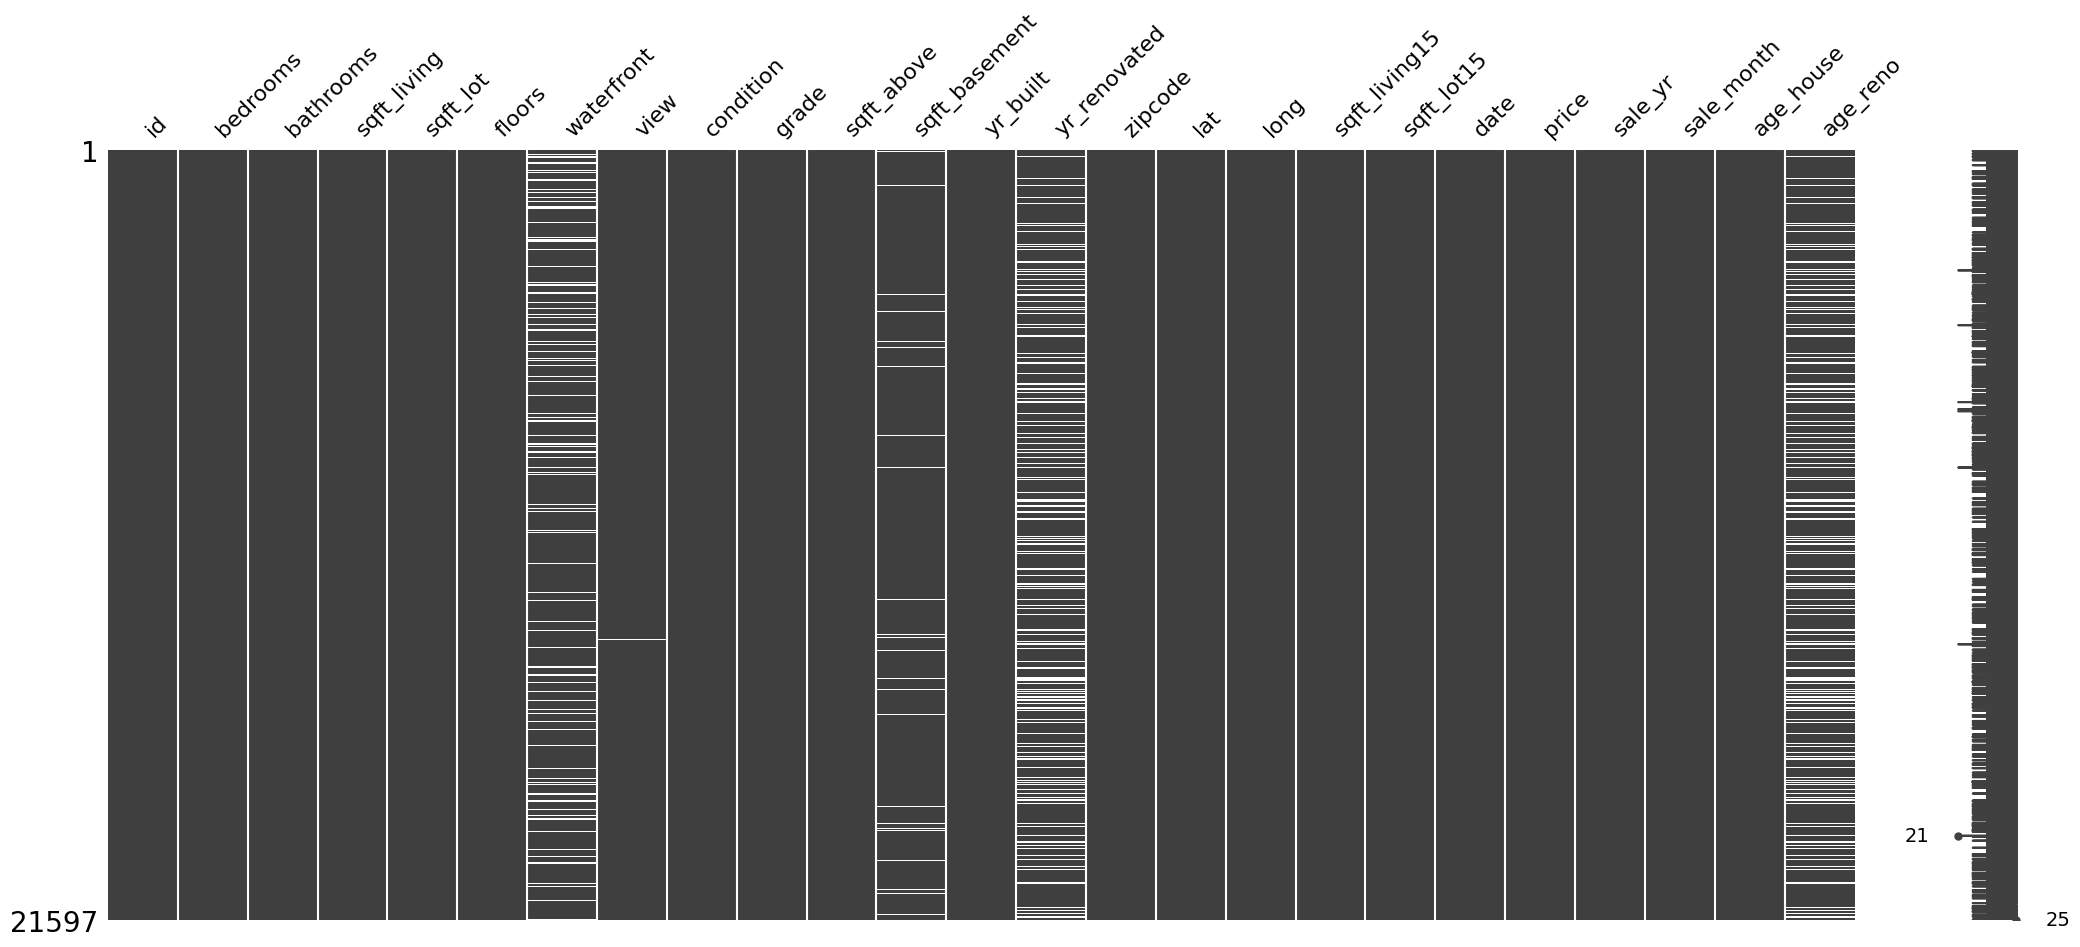

In [117]:
# display distribution of missing values
msno.matrix(df)

As you can see, there are not many rows where missing values occur together. And overall, there is no clear pattern in the missing data. Therefore, we have to assume, that the missing data occurs randomly. Which is not helping us at all on how to best treat this missing values.

#### Drop data  
Since we assume that the missing data occurs randomly, it's impossible for us to replace the missing value.  
In our case, only 4 columns with missing values and the amount doesn't seem too much. So, we can easily drop them.  

In [118]:
#drop all rows if they contain at least one missing value (in any column)
df = df.dropna()
df.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
sale_yr          0
sale_month       0
age_house        0
age_reno         0
dtype: int64

Now we have no more missing values.  
  
As we mentioned above, now we can change the data type for the "waterfront" column.

In [119]:
# change the data type of column "waterfront" to boolean type
df['waterfront'] = df['waterfront'].astype('bool')
df['waterfront'].unique()

array([False,  True])

In [159]:
# Drop useless column
df.drop(['id'], axis=1, inplace=True)
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'sale_yr', 'sale_month',
       'age_house', 'age_reno'],
      dtype='object')

In [160]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,date,price,sale_yr,sale_month,age_house,age_reno
1,3.00,2.25,"2,570.00","7,242.00",2.00,False,0.00,3,7,"2,170.00",...,47.72,-122.32,"1,690.00","7,639.00",2014-12-09,"538,000.00",2014,12,63,23.00
3,4.00,3.00,"1,960.00","5,000.00",1.00,False,0.00,5,7,"1,050.00",...,47.52,-122.39,"1,360.00","5,000.00",2014-12-09,"604,000.00",2014,12,49,49.00
4,3.00,2.00,"1,680.00","8,080.00",1.00,False,0.00,3,8,"1,680.00",...,47.62,-122.05,"1,800.00","7,503.00",2015-02-18,"510,000.00",2015,2,28,28.00
5,4.00,4.50,"5,420.00","101,930.00",1.00,False,0.00,3,11,"3,890.00",...,47.66,-122.00,"4,760.00","101,930.00",2014-05-12,"1,230,000.00",2014,5,13,13.00
8,3.00,1.00,"1,780.00","7,470.00",1.00,False,0.00,3,7,"1,050.00",...,47.51,-122.34,"1,780.00","8,113.00",2015-04-15,"229,500.00",2015,4,55,55.00


Now, the dataset is ready for anaylsis!

### General Analysis of the Data  

Let's firstly have a look at our numerical variables and their descriptive statistics.

In [161]:
# check descriptive statistics of the data frame
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,sale_yr,sale_month,age_house,age_reno
count,"15,413.00","15,413.00","15,413.00","15,413.00","15,413.00","15,413.00","15,413.00","15,413.00","15,413.00","15,413.00",...,"15,413.00","15,413.00","15,413.00","15,413.00","15,413.00","15,413.00","15,413.00","15,413.00","15,413.00","15,413.00"
mean,3.38,2.12,"2,086.46","15,307.52",1.49,0.23,3.41,7.67,"1,794.51",291.95,...,"98,077.43",47.56,-122.21,"1,991.61","12,878.08","541,925.93","2,014.32",6.58,43.17,40.85
std,0.93,0.77,919.50,"42,044.30",0.54,0.76,0.65,1.17,829.49,443.41,...,53.46,0.14,0.14,684.99,"27,830.40","373,114.30",0.47,3.11,29.29,28.77
min,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,370.00,0.00,...,"98,001.00",47.16,-122.52,399.00,659.00,"82,000.00","2,014.00",1.00,-1.00,-1.00
25%,3.00,1.75,"1,430.00","5,050.00",1.00,0.00,3.00,7.00,"1,200.00",0.00,...,"98,032.00",47.47,-122.33,"1,490.00","5,100.00","322,000.00","2,014.00",4.00,18.00,16.00
50%,3.00,2.25,"1,920.00","7,620.00",1.50,0.00,3.00,7.00,"1,570.00",0.00,...,"98,065.00",47.57,-122.23,"1,850.00","7,627.00","450,000.00","2,014.00",6.00,39.00,37.00
75%,4.00,2.50,"2,550.00","10,723.00",2.00,0.00,4.00,8.00,"2,220.00",560.00,...,"98,117.00",47.68,-122.12,"2,370.00","10,120.00","645,000.00","2,015.00",9.00,62.00,60.00
max,33.00,8.00,"13,540.00","1,651,359.00",3.50,4.00,5.00,13.00,"9,410.00","4,820.00",...,"98,199.00",47.78,-121.31,"6,210.00","871,200.00","7,700,000.00","2,015.00",12.00,115.00,115.00


In [162]:
# sort the date from early to late
df['date'].sort_values()

19661   2014-05-02
19051   2014-05-02
4331    2014-05-02
11565   2014-05-02
12484   2014-05-02
           ...    
21434   2015-05-14
11548   2015-05-14
5632    2015-05-15
13040   2015-05-24
16580   2015-05-27
Name: date, Length: 15413, dtype: datetime64[ns]

<AxesSubplot:xlabel='sale_yr', ylabel='count'>

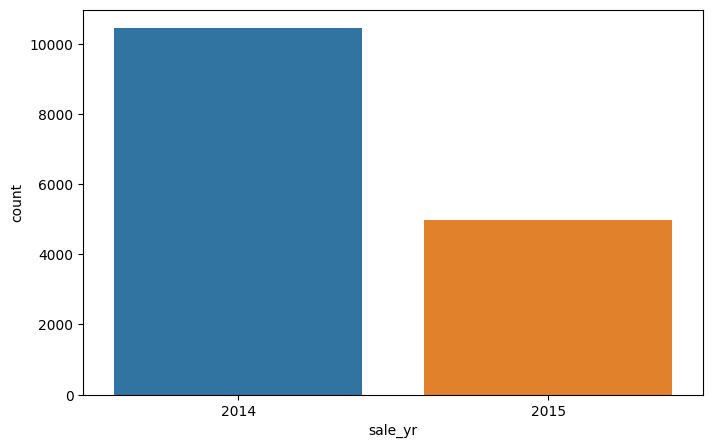

In [163]:
# distribution of house sale in 2014 and 2015
sns.countplot(x=df["sale_yr"])

#### A geographical map view of houses to be sold in Seattle

In [164]:
# draw a density heatmap in Seattle for house sales
fig1 = px.density_mapbox(df, lat='lat', lon='long', radius=5,
                        center=dict(lat=47.608013, lon=-122.335167), zoom=9,
                        mapbox_style="stamen-terrain", width=1200, height=900)
fig1.show()

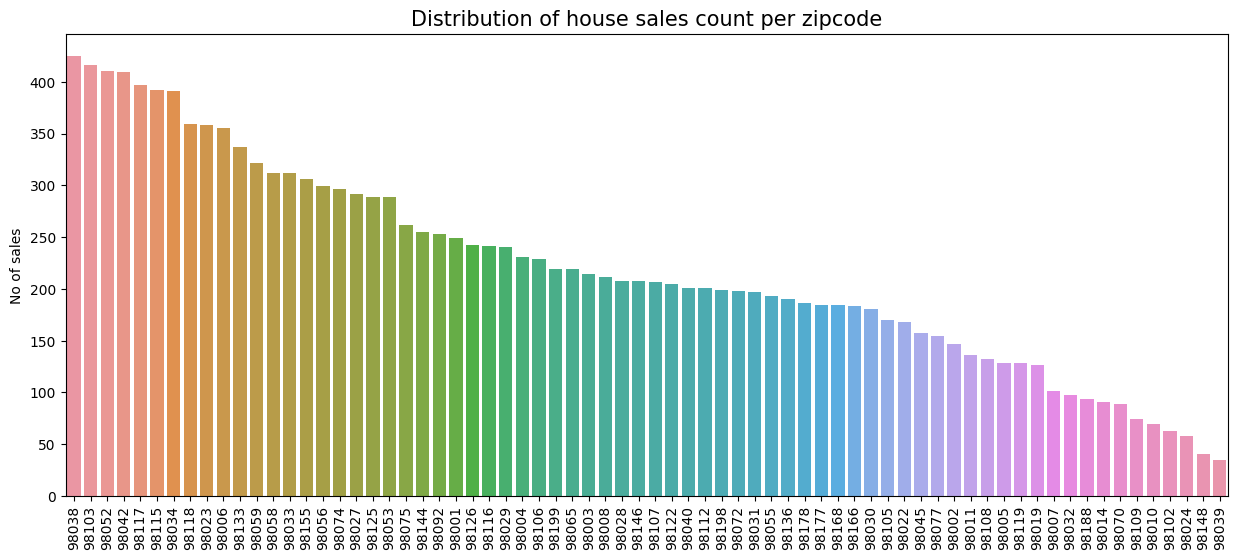

In [165]:
# Plot distribution of house sales count per zipcode
plt.figure(figsize=(15,6)) # specify figure size
f1 = sns.countplot(data=df, x='zipcode',order=df['zipcode'].value_counts().iloc[:].index) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("No of sales", fontsize = 10); # set label for y-axis
f1.set_title('Distribution of house sales count per zipcode', fontsize=15); # set title
plt.savefig('images/house_sales_count_per_zipcode')

#### What is the price distribution of the sold houses?

<Figure size 1000x800 with 0 Axes>

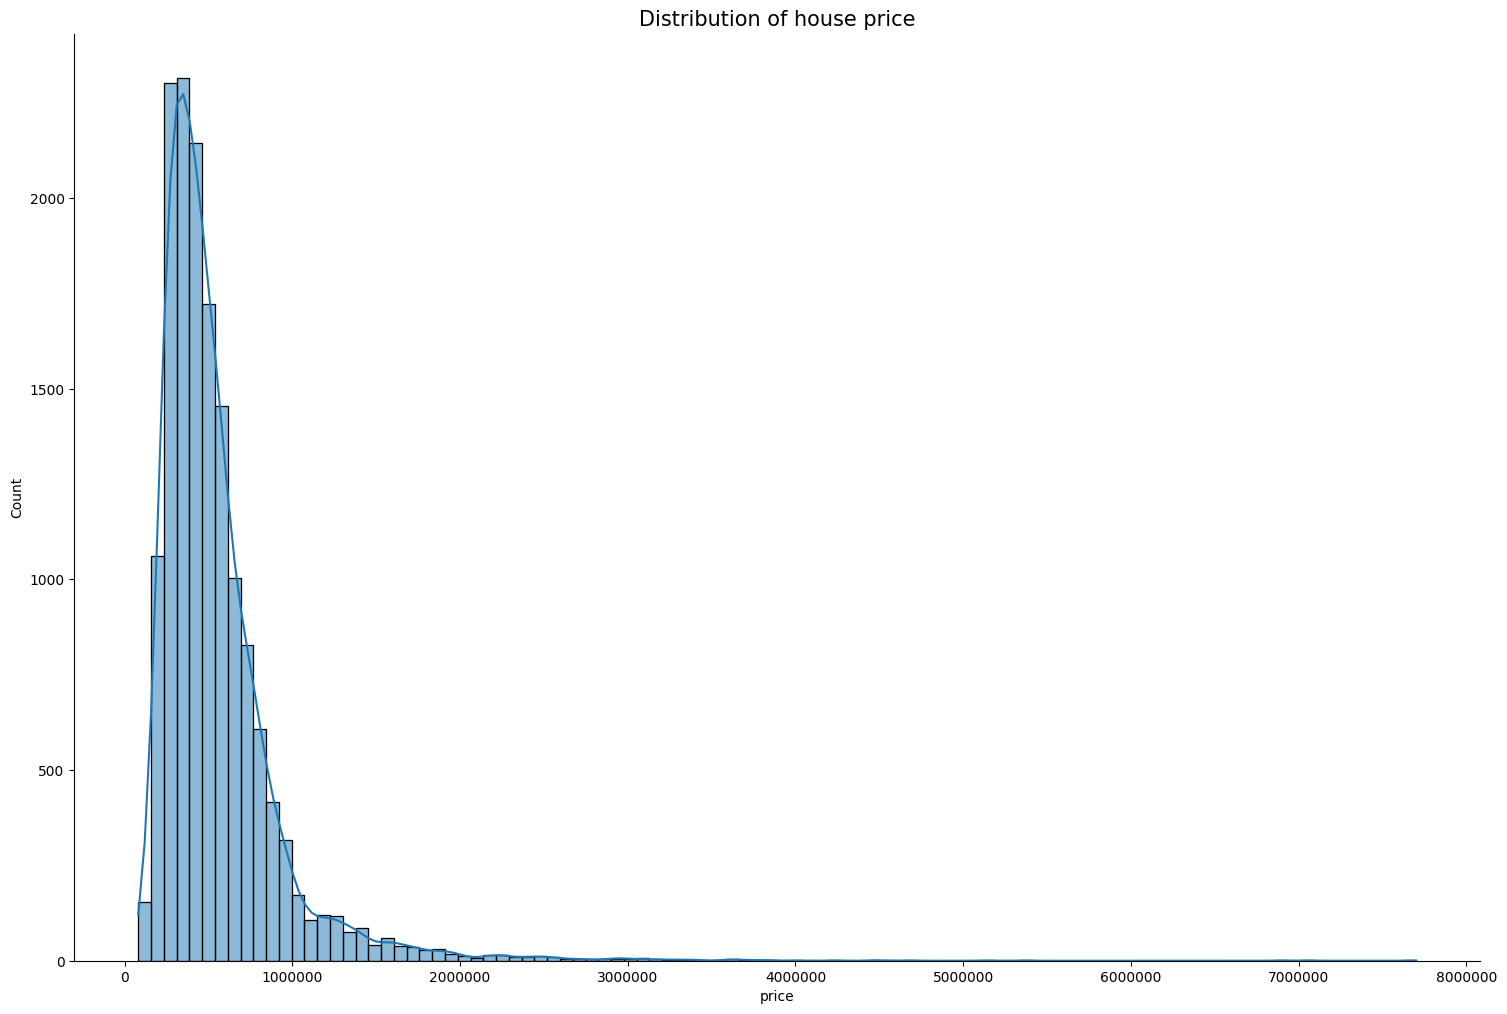

In [166]:
plt.figure(figsize=(10, 8))
sns.displot(x='price', data=df, bins=100, kde=True, height=10, aspect=1.5)
plt.ticklabel_format(style='plain', axis='x')
# plt.xlim(0,8000000)
plt.xlabel="price in $"
plt.title("Distribution of house price", fontsize=15)
plt.savefig("images/house_price_distribution.png")

#### What is the age range of the houses?

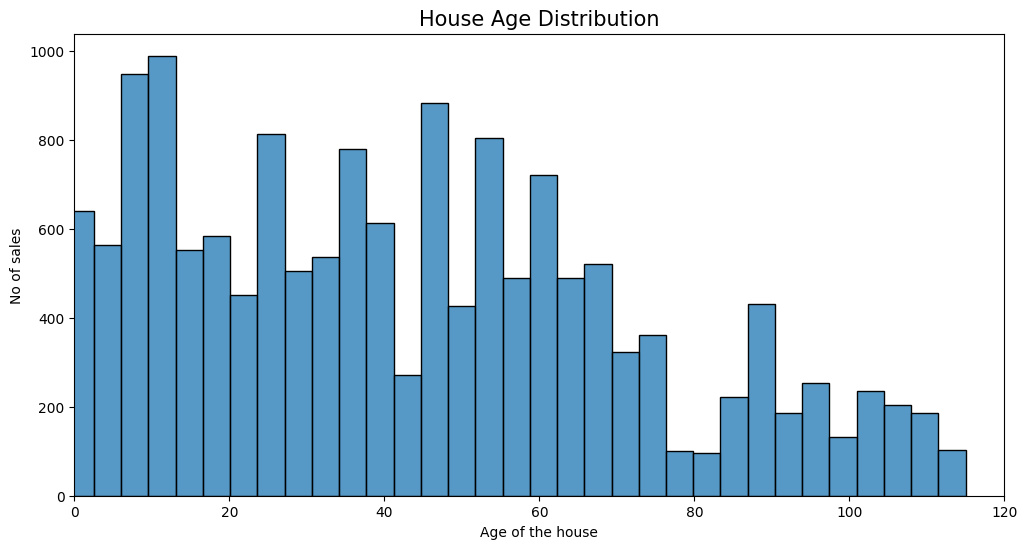

In [167]:
plt.figure(figsize=(12,6))
f1 = sns.histplot(data=df, x='age_house')
f1.set_xlabel("Age of the house")
f1.set_ylabel("No of sales", fontsize = 10)
plt.xlim(0,120)
f1.set_title('House Age Distribution', fontsize=15)
plt.savefig('images/house_age_distribution.png')

## Questions to be researched:  
1. Which  factors have the greatest impact on house price?  

2. When is the best timing for house sales business?  

3. Which factors are the key to increase the sale of expensive houses?  


### Q1. Which  factors have the greatest impact on house price?

#### Correlation matrix between features

In [168]:
# corr_columns=["price", "sqft_living", "sqft_lot", "waterfront", "view", "condition", "grade", "age_house", "age_reno"]
corr_columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade',
       'zipcode','sqft_living15', 'sqft_lot15',
       'age_house', 'age_reno','price']
corr_mtrx=df[corr_columns].corr()
corr_mtrx

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_lot15,age_house,age_reno,price
bedrooms,1.00,0.51,0.57,0.03,0.18,-0.00,0.08,0.02,0.35,-0.15,0.39,0.03,-0.15,-0.16,0.31
bathrooms,0.51,1.00,0.75,0.08,0.51,0.07,0.18,-0.13,0.66,-0.20,0.57,0.08,-0.51,-0.54,0.52
sqft_living,0.57,0.75,1.00,0.17,0.36,0.11,0.29,-0.07,0.76,-0.19,0.76,0.18,-0.32,-0.34,0.71
sqft_lot,0.03,0.08,0.17,1.00,-0.01,0.03,0.08,-0.02,0.11,-0.13,0.14,0.72,-0.05,-0.05,0.08
floors,0.18,0.51,0.36,-0.01,1.00,0.02,0.03,-0.26,0.46,-0.06,0.28,-0.01,-0.49,-0.50,0.26
waterfront,-0.00,0.07,0.11,0.03,0.02,1.00,0.41,0.02,0.08,0.03,0.09,0.03,0.02,0.00,0.28
view,0.08,0.18,0.29,0.08,0.03,0.41,1.00,0.04,0.25,0.09,0.28,0.07,0.05,0.02,0.40
condition,0.02,-0.13,-0.07,-0.02,-0.26,0.02,0.04,1.00,-0.15,0.00,-0.10,-0.01,0.37,0.40,0.03
grade,0.35,0.66,0.76,0.11,0.46,0.08,0.25,-0.15,1.00,-0.18,0.72,0.12,-0.44,-0.46,0.66
zipcode,-0.15,-0.20,-0.19,-0.13,-0.06,0.03,0.09,0.00,-0.18,1.00,-0.28,-0.15,0.34,0.32,-0.05


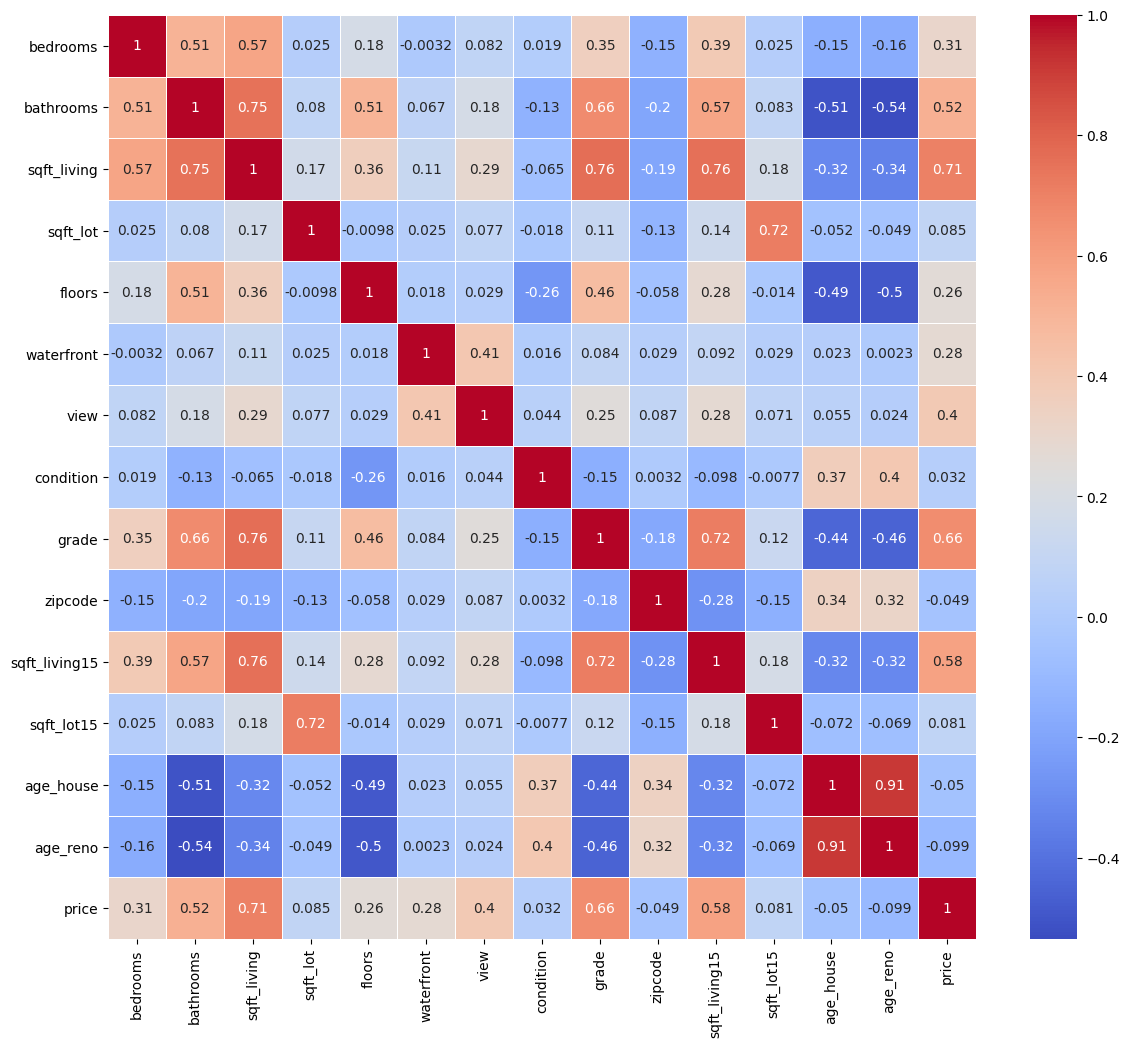

In [169]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

From the correlation matrix, we can see that the house price is highly related to the living space, house grade, number of bathrooms and bedrooms.

#### Correlation between living space and house price

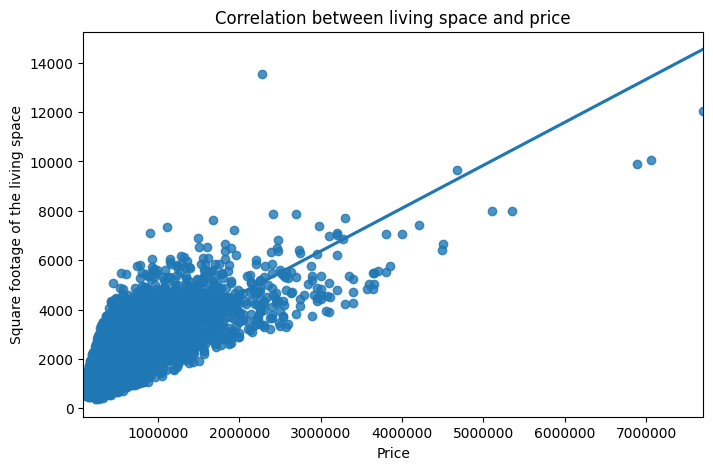

In [170]:
# Plot distribution of living space w.r.t. house price
price_sqftliving = sns.regplot(data=df, x="price", y="sqft_living",ci= None)
price_sqftliving.set(xlabel= "Price", ylabel="Square footage of the living space", title="Correlation between living space and price")
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('images/living_space_vs_price.png')

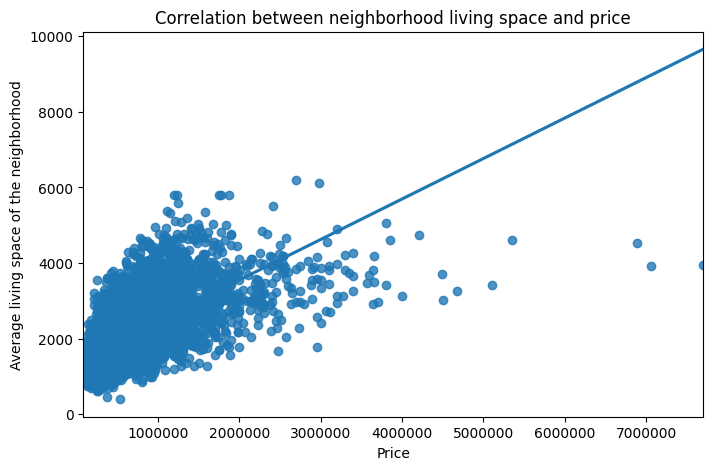

In [171]:
# Plot distribution of neighborhood living space w.r.t. house price
price_sqftliving = sns.regplot(data=df, x="price", y="sqft_living15",ci= None)
price_sqftliving.set(xlabel= "Price", ylabel="Average living space of the neighborhood", title="Correlation between neighborhood living space and price")
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('images/living_space_vs_price.png')

From the plots above, we can see that the house price is positive related with the living space as well as the neighborhood living space.

#### Correlation between house grade and house price

In [172]:
# display discrete values for the house grade
df["grade"].unique()

array([ 7,  8, 11,  9,  6,  5, 10, 12,  4,  3, 13])

[Text(0.5, 0, 'Overall grade giving to the housing unit (based on King County grading system)'),
 Text(0, 0.5, 'Sale price'),
 Text(0.5, 1.0, 'Distribution of house price based on house grade')]

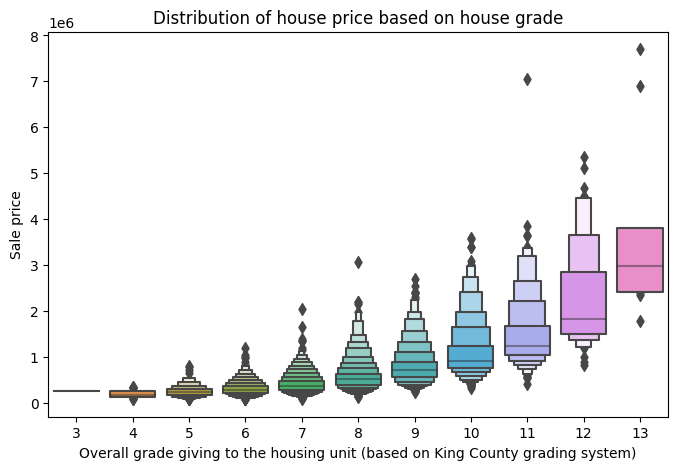

In [173]:
# plot distribution of house price based on house grade
price_sqftliving = sns.boxenplot(data=df, x="grade", y="price", scale='linear')
price_sqftliving.set(xlabel= "Overall grade giving to the housing unit (based on King County grading system)", ylabel="Sale price", title="Distribution of house price based on house grade")

The house grade is based on the King County grading system, which is the overall grade giving to the housing unit.  
From the distribution plot we can see that, with higher house grade, the house price is more likely to be higher.

### Q2: When is the best timing for house sales business?

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'No. of sales'),
 Text(0.5, 1.0, 'Number of house sales per month')]

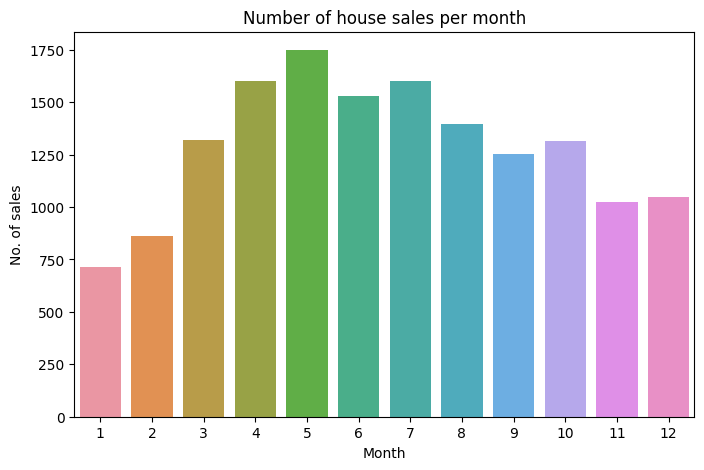

In [174]:
# plot the number of house sales per month
month_distr_plot = sns.countplot(x=df["sale_month"])
month_distr_plot.set(xlabel= "Month", ylabel="No. of sales", title="Number of house sales per month")

From the distribution plot above, we can see that the months with most house sales are April, May, June, July.  
Some possible reasons are analyzed as below:
- The weather in these 4 months are good and there are more sunny days.
- Many families with kids are searching for house, because they need to move before the school starts on September.
- In winter, most people are busy with holidays and festivals.

Also, It's interested to know if the average prices in these 4 months are the key points for more house sales. Let's check it!

In [175]:
# group by the month to get the average price
df_avg_price = df.groupby('sale_month').mean()
df_avg_price

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,sale_yr,age_house,age_reno
sale_month,,,,,,,,,,,,,,,,,,,,,
1,3.41,2.15,"2,111.51","17,845.81",1.50,0.01,0.22,3.37,7.65,"1,837.61",...,"1,973.85","98,076.40",47.55,-122.21,"1,979.67","12,943.88","532,598.39","2,015.00",43.07,41.15
2,3.36,2.04,"2,005.40","13,627.07",1.45,0.00,0.25,3.42,7.55,"1,704.81",...,"1,971.93","98,077.75",47.54,-122.22,"1,938.53","11,149.13","505,299.10","2,015.00",44.54,43.07
3,3.40,2.08,"2,036.55","16,160.54",1.47,0.01,0.23,3.36,7.62,"1,754.86",...,"1,973.34","98,076.89",47.55,-122.21,"1,966.20","13,226.99","550,209.17","2,015.00",44.02,41.66
4,3.38,2.14,"2,079.61","14,520.25",1.50,0.01,0.23,3.36,7.68,"1,799.97",...,"1,974.29","98,078.95",47.56,-122.21,"1,999.28","12,973.63","566,237.68","2,015.00",42.55,40.71
5,3.36,2.11,"2,082.22","16,274.71",1.48,0.00,0.22,3.42,7.67,"1,775.71",...,"1,973.33","98,078.49",47.56,-122.22,"1,985.31","13,422.70","546,936.05","2,014.26",44.05,40.94
6,3.44,2.17,"2,142.08","15,244.39",1.52,0.01,0.23,3.47,7.73,"1,838.62",...,"1,972.71","98,078.66",47.57,-122.21,"2,035.79","13,373.08","559,391.51","2,014.00",43.18,41.29
7,3.37,2.14,"2,118.21","14,687.01",1.51,0.01,0.22,3.45,7.71,"1,826.16",...,"1,974.43","98,073.61",47.56,-122.20,"2,033.40","13,310.86","540,581.65","2,014.00",42.17,39.57
8,3.38,2.14,"2,099.92","14,514.85",1.51,0.01,0.22,3.42,7.71,"1,823.37",...,"1,975.42","98,076.58",47.56,-122.21,"2,006.01","12,793.72","537,390.75","2,014.00",41.02,38.58
9,3.35,2.13,"2,075.55","14,672.26",1.49,0.01,0.24,3.42,7.65,"1,776.27",...,"1,973.05","98,077.74",47.56,-122.22,"1,989.83","11,381.67","531,828.32","2,014.00",43.62,40.95


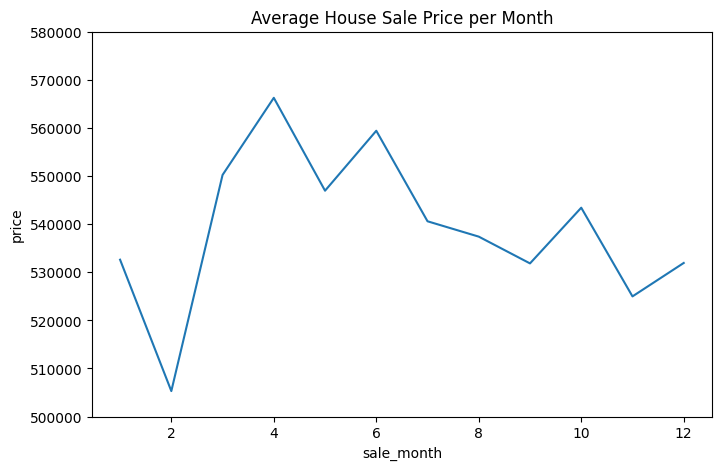

<Figure size 800x500 with 0 Axes>

In [182]:
sns.lineplot(x=df_avg_price.index, y=df_avg_price['price'])
plt.ylim(500000, 580000)
plt.title("Average House Sale Price per Month")
plt.show()
plt.savefig('images/average_price_per_month.png')

We can see that the average price is even higher than the other months. Seems that the price is not the key point for more house sales from April to Juli.

### Q3: Which factors are the key to increase the sale of expensive houses?  


Since our stakeholder want to have big return, so he should focus on more expensive houses.  
We consider the house is expensive with the price higher than the average house price.

#### General overview of expensive houses

In [186]:
# filter df to get new data frame for expensive houses
df_expensive = df[df['price'] > df['price'].mean()]

# statistic price information of expensive houses 
df_expensive['price'].describe()

count       5,639.00
mean      863,395.07
std       446,889.75
min       542,000.00
25%       619,000.00
50%       730,000.00
75%       915,000.00
max     7,700,000.00
Name: price, dtype: float64

In [189]:
# draw a density heatmap in Seattle for expensive houses
fig1 = px.density_mapbox(df_expensive, lat='lat', lon='long', radius=5,
                        center=dict(lat=47.608013, lon=-122.335167), zoom=9,
                        mapbox_style="stamen-terrain", width=1200, height=900)
fig1.show()

From the map above, we can see that most expensive houses are centralized, and many expensive houses are located around the lake.

#### Is a waterfront view important for expensive house sales?

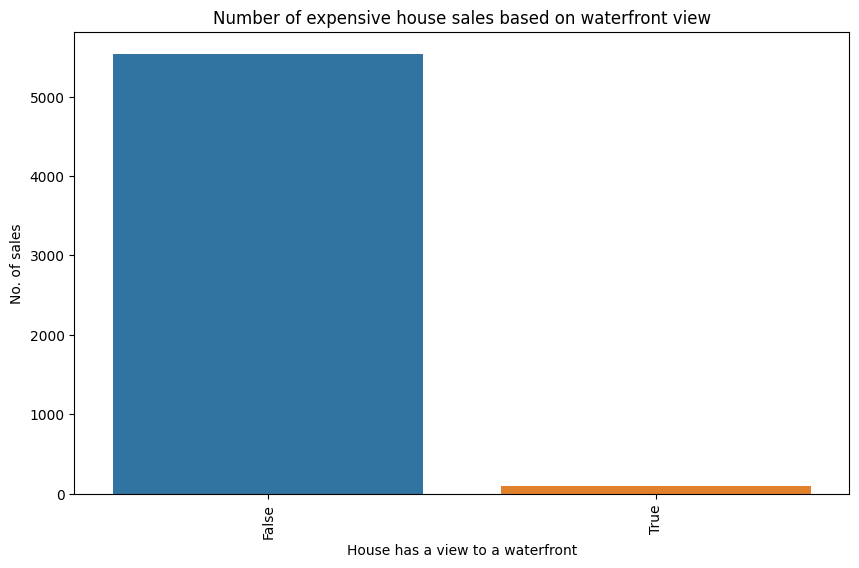

In [207]:
# comparison of expensive house sales based on waterfront view
plt.figure(figsize=(10,6))
waterfront_plot_cc = sns.countplot(x=df_expensive["waterfront"])
waterfront_plot_cc.tick_params(axis='x', rotation=90)
waterfront_plot_cc.set(xlabel= "House has a view to a waterfront", ylabel="No. of sales", title="Number of expensive house sales based on waterfront view")
plt.savefig('images/exp_house_waterfront.png')

We can see that the number of expensive house sales with a view to a waterfront is very small.  
The possible reasons could be:  
- The number of houses with a waterfront view is very limited.
- Lakefront houses may have some issues, eg. ownership, rising water, maintenance.

#### Is the renovation age important for expensive house sales?

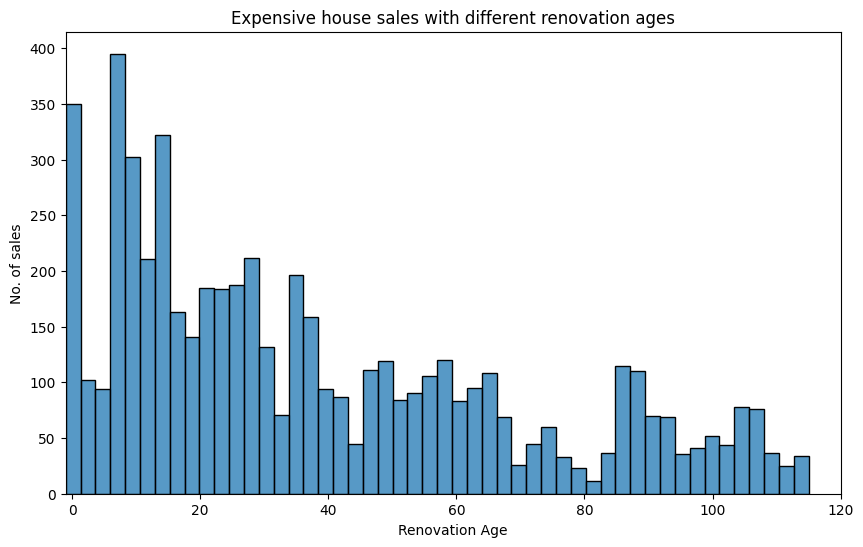

In [206]:
# plot expensive house sales based on renovation age
plt.figure(figsize=[10,6])
plt.xlim(-1,120)
revo_age_distr = sns.histplot(x=df_expensive["age_reno"],bins=50)
revo_age_distr.set(xlabel= "Renovation Age", ylabel="No. of sales", title="Expensive house sales with different renovation ages")
plt.savefig('images/exp_house_renovation_age.png')

From the distribution above, we can see that there are more expensive houses sold with a younger renovation age. Especially, the houses renovated in last 15 years were more popular.

#### Is house grade important for expensive house sales?

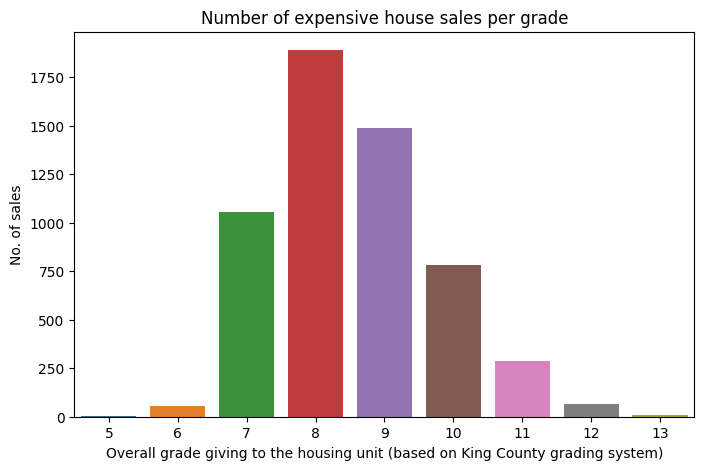

In [205]:
# plot expensive house sales per grade
grade_distr_plot_cc = sns.countplot(x=df_expensive["grade"])
grade_distr_plot_cc.set(xlabel= "Overall grade giving to the housing unit (based on King County grading system)", ylabel="No. of sales", title="Number of expensive house sales per grade")
plt.savefig('images/exp_house_grage.png')

We can see that, there are more expensive houses sold with grade in 8 and 9.

#### Which Zipcode has more expensive houses sold?

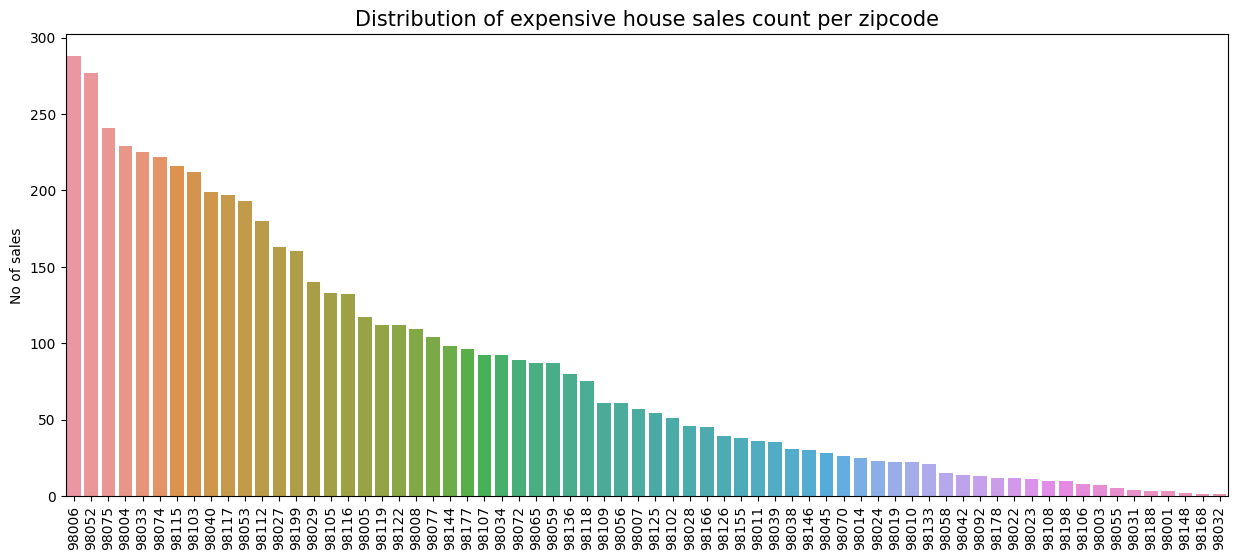

In [209]:
# Plot distribution of expensive house sales count per zipcode
plt.figure(figsize=(15,6)) # specify figure size
f1 = sns.countplot(data=df_expensive, x='zipcode',order=df_expensive['zipcode'].value_counts().iloc[:].index) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("No of sales", fontsize = 10); # set label for y-axis
f1.set_title('Distribution of expensive house sales count per zipcode', fontsize=15); # set title
plt.savefig('images/exp_house_per_zipcode.png')

From the plot, we can see that there are more expensive houses sold in the area with zip code 98006 and 98052.

## Conclusion
- House price is positive related to the living space, neighborhood, as well as the house grade.  

- The best months for house sales in the year are April, May, June and July.  

- To sell more expensive houses, the stakeholder should focus more about the houses located in the city, especially in the area with zip code 98006 and 98052.   
Besides, the stakeholder should also notice more about the houses with grade 8 and 9, and were relative new renovated.  